## Organisation metrics, all models together

ROME
<br />

Number index and area fraction
<br />

Precipitation Weighted Area Distribution (pwad)

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

from os.path import expanduser
home = expanduser("~")

import timeit

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 


switch = {
    'local_files': True, 
    'nci_files': False, 
    }

In [2]:
models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 # cannot concatanate files for rcp85 run
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]


experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]

### ROME

In [3]:
model = 'GFDL-CM3'
experiment = 'historical'
if switch['local_files']:
    folder = home + '/Documents/data/cmip5/' + model

if switch['nci_files']:
    folder = '/g/data/k10/cb4968/data/cmip5/'+ model


fileName = model + '_rome_' + experiment + '.nc'
path = folder + '/' + fileName
rome = xr.open_dataset(path)
rome

<xarray.Dataset>
Dimensions:  (time: 10950)
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
Data variables:
    rome     (time) float64 ...
    rome_n   (time) float64 ...
Attributes:
    description:  ROME based on all and the 8 largest contiguous convective r...
    units:        km^2

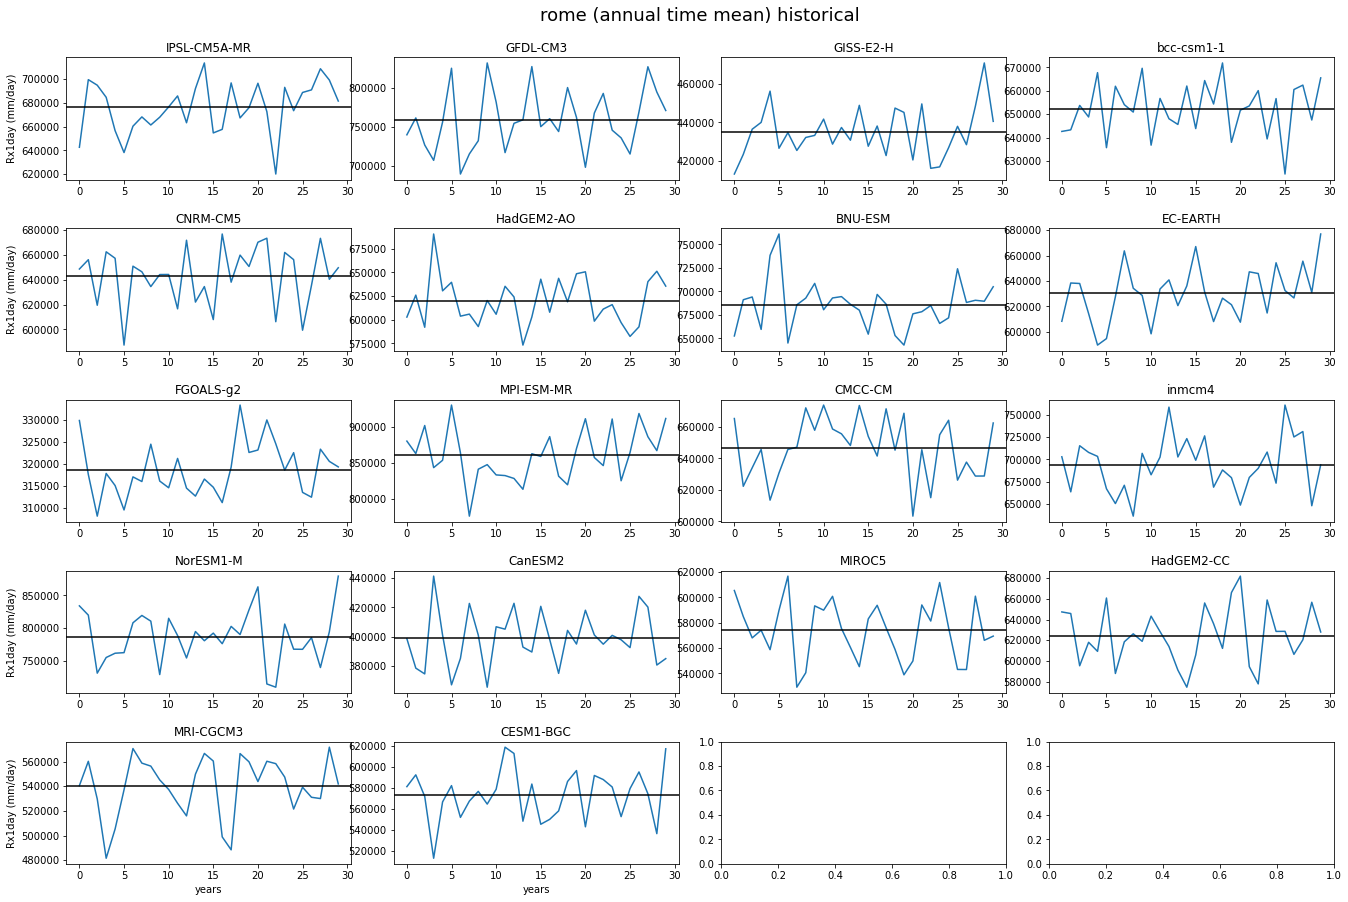

In [4]:
f, axes = plt.subplots(nrows=5, ncols=4, figsize = (22,14))
f.suptitle('rome (annual time mean) ' + experiment, fontsize=18, y=0.95)

for model, ax in zip(models, axes.ravel()):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)

    ax.plot(rome.rome.resample(time='Y').mean(dim='time'))
    ax.axhline(y=rome.rome.resample(time='Y').mean(dim='time').mean(dim='time'), color='k')
    ax.set_title(model)

    if model == 'MRI-CGCM3' or model == 'CESM1-BGC':
        ax.set_xlabel('years')

    if model == 'IPSL-CM5A-MR' or model == 'CNRM-CM5' or model == 'NorESM1-M' or model == 'MRI-CGCM3': 
        ax.set_ylabel('rome (km^2)')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.4)

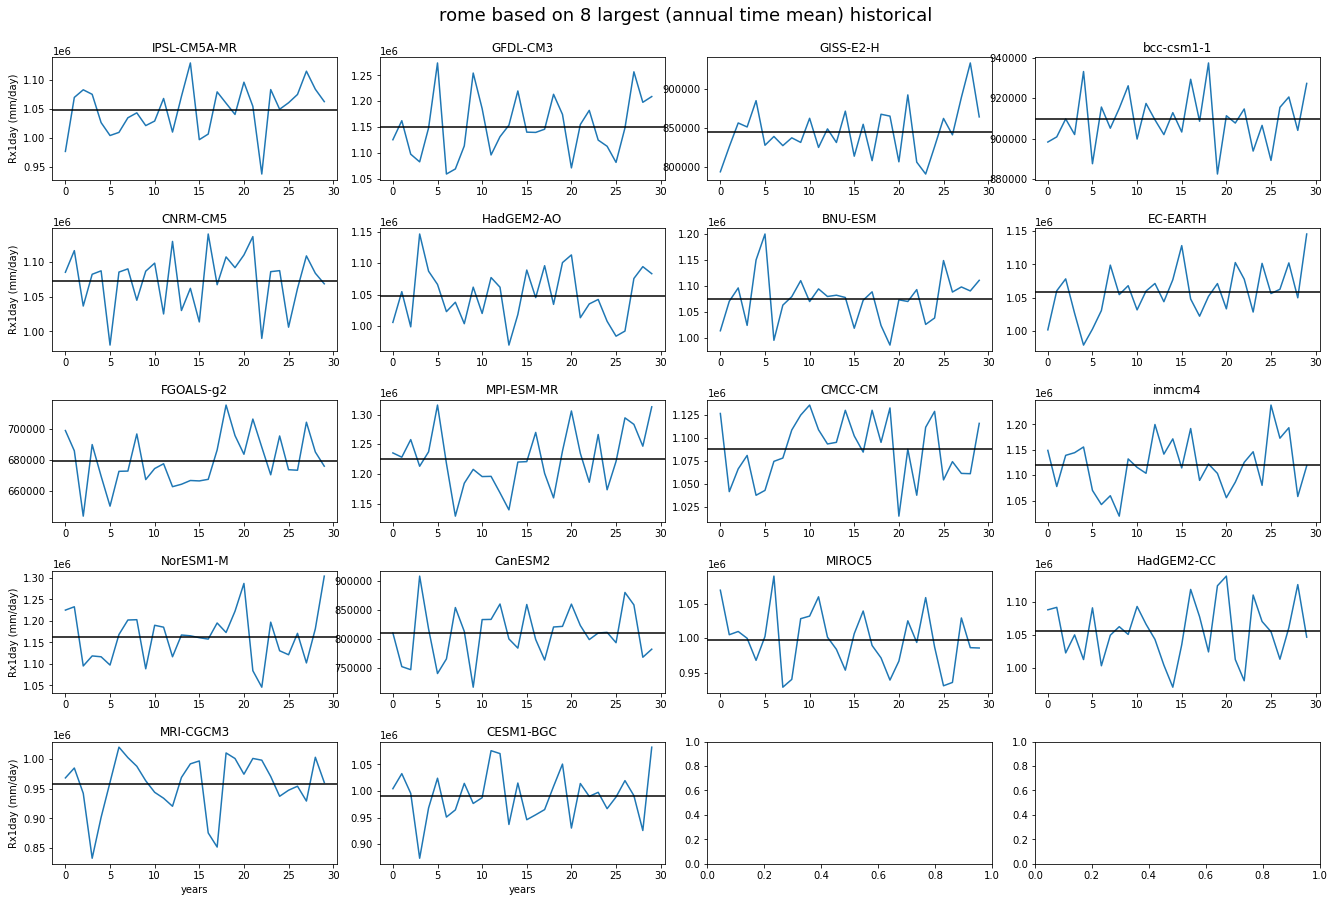

In [5]:
f, axes = plt.subplots(nrows=5, ncols=4, figsize = (22,14))
f.suptitle('rome based on 8 largest (annual time mean) ' + experiment, fontsize=18, y=0.95)

for model, ax in zip(models, axes.ravel()):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)

    ax.plot(rome.rome_n.resample(time='Y').mean(dim='time'))
    ax.axhline(y=rome.rome_n.resample(time='Y').mean(dim='time').mean(dim='time'), color='k')
    ax.set_title(model)

    if model == 'MRI-CGCM3' or model == 'CESM1-BGC':
        ax.set_xlabel('years')

    if model == 'IPSL-CM5A-MR' or model == 'CNRM-CM5' or model == 'NorESM1-M' or model == 'MRI-CGCM3': 
        ax.set_ylabel('rome (km^2)')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.4)

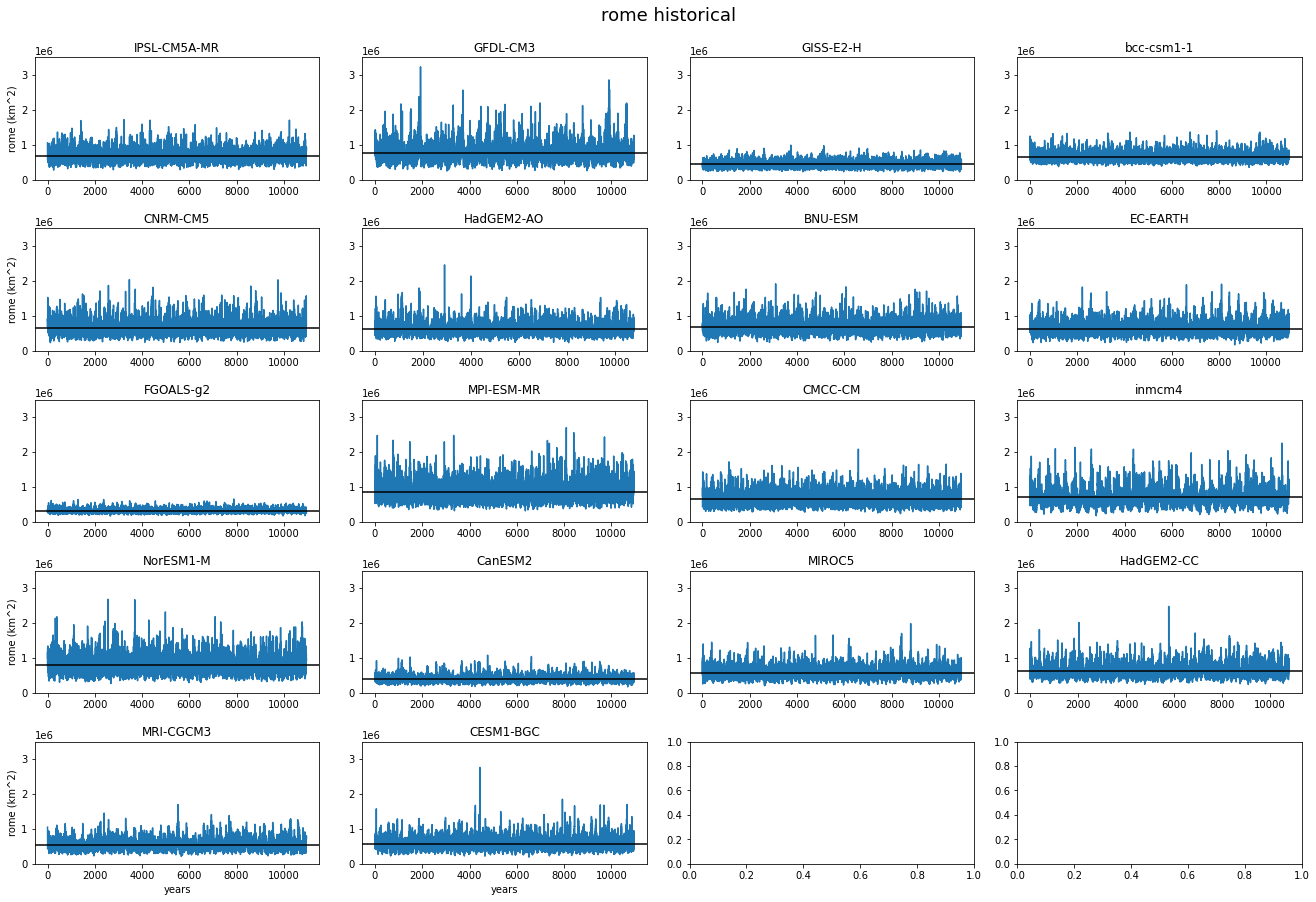

In [13]:
f, axes = plt.subplots(nrows=5, ncols=4, figsize = (22,14))
f.suptitle('rome ' + experiment, fontsize=18, y=0.95)

for model, ax in zip(models, axes.ravel()):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)

    ax.plot(rome.rome)
    ax.axhline(y=rome.rome.mean(dim='time'), color='k')
    ax.set_ylim(0,3.5e6)
    ax.set_title(model)

    if model == 'MRI-CGCM3' or model == 'CESM1-BGC':
        ax.set_xlabel('years')

    if model == 'IPSL-CM5A-MR' or model == 'CNRM-CM5' or model == 'NorESM1-M' or model == 'MRI-CGCM3': 
        ax.set_ylabel('rome (km^2)')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.4)

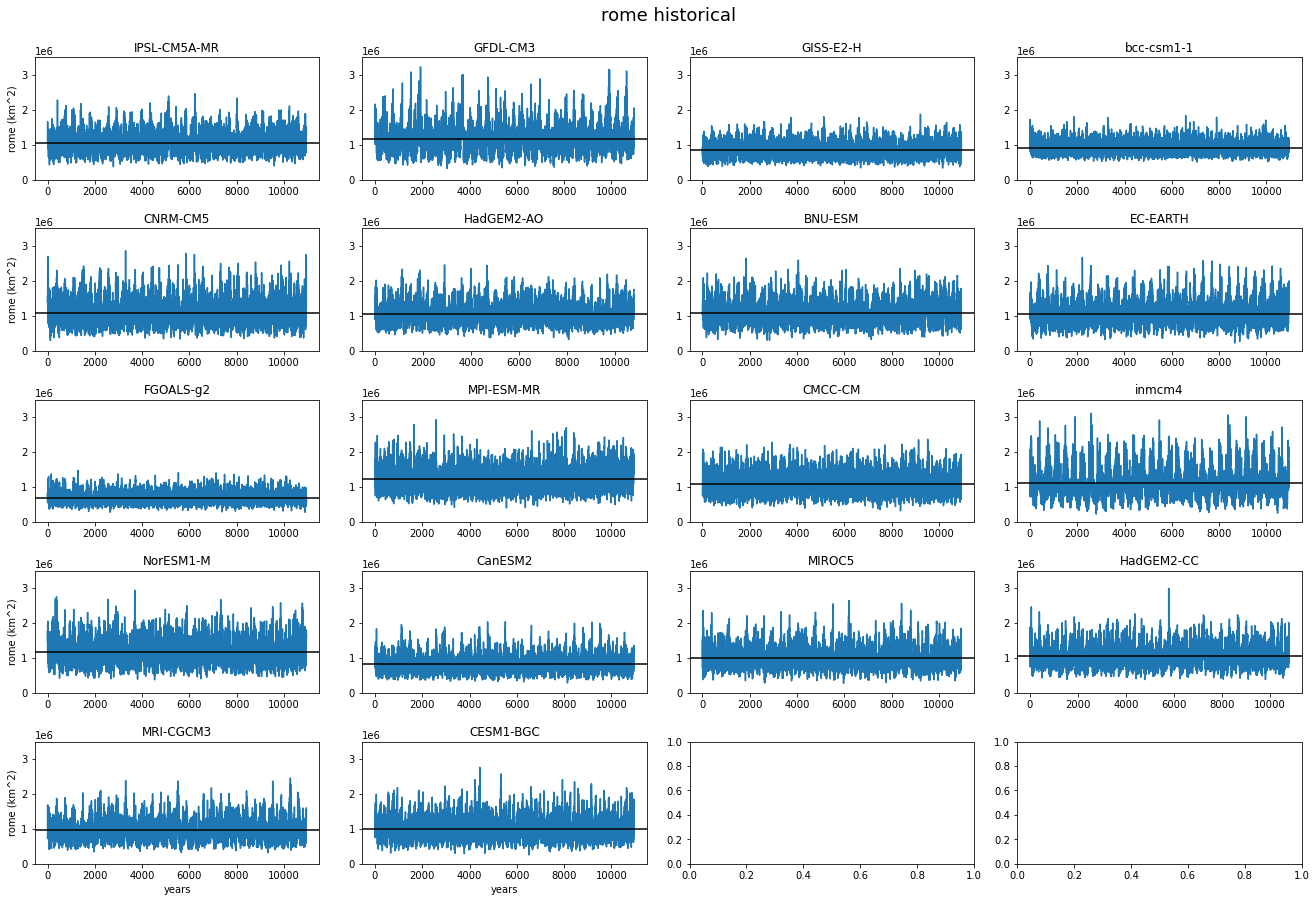

In [15]:
f, axes = plt.subplots(nrows=5, ncols=4, figsize = (22,14))
f.suptitle('rome ' + experiment, fontsize=18, y=0.95)

for model, ax in zip(models, axes.ravel()):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)

    ax.plot(rome.rome_n)
    ax.axhline(y=rome.rome_n.mean(dim='time'), color='k')
    ax.set_ylim(0,3.5e6)
    ax.set_title(model)

    if model == 'MRI-CGCM3' or model == 'CESM1-BGC':
        ax.set_xlabel('years')

    if model == 'IPSL-CM5A-MR' or model == 'CNRM-CM5' or model == 'NorESM1-M' or model == 'MRI-CGCM3': 
        ax.set_ylabel('rome (km^2)')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.4)